In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from qiskit import *
from qiskit.providers.ibmq import least_busy

from qiskit.tools.visualization import plot_histogram
from IPython.display import display, Math, Latex

In [2]:
def Increment(size):
    U = QuantumCircuit(size)
    control = [x for x in range(size-1)]
    for k in range(size-1):
        U.mcx(control, control[-1]+1)
        control.pop()
    U.x(0)
    
    U = U.to_gate()
    U.name = '--->'
    ctl_U = U.control()
    
    return ctl_U

In [3]:
def Decrement(size):
    U = QuantumCircuit(size)
    control = [x for x in range(size-1)]
    for k in range(size-1):
        U.x(control)
        U.mcx(control, control[-1]+1)
        U.x(control)
        control.pop()
    U.x(0)
    
    U = U.to_gate()
    U.name = '<---'
    ctl_U = U.control()
    
    return ctl_U

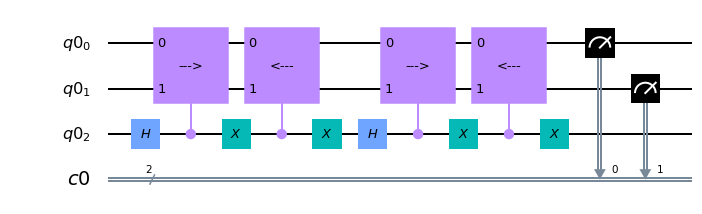

In [4]:
n = 2
steps = 2

graph = QuantumRegister(n+1)
mes = ClassicalRegister(n)
mcq = QuantumCircuit(graph, mes)

#define U(t)
for i in range(steps):
    mcq.h(n)
    mcq.append(Increment(n), [n]+list(range(0, n)))
    mcq.x(n)
    mcq.append(Decrement(n), [n]+list(range(0, n)))
    mcq.x(n)

mcq.measure(range(n), range(n))

#mcq = transpile(mcq, basis_gates=['cx','u3'],optimization_level=3)

mcq.draw('mpl')

In [15]:
backend = BasicAer.get_backend('qasm_simulator')
atp = 1024
res = execute(mcq, backend=backend, shots=atp).result()
ans = res.get_counts()

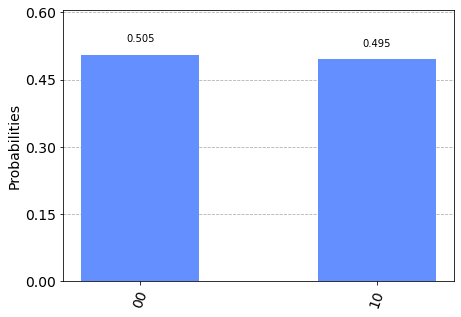

In [16]:
plot_histogram(ans)

In [17]:
IBMQ.load_account()

provider = IBMQ.get_provider(group='open', project='main')
backend = provider.get_backend('ibmq_16_melbourne')
job = execute(mcq, backend=backend)
ans_quantum = job.result().get_counts()

ibmqfactory.load_account:WARNING:2020-07-30 23:29:04,209: Credentials are already in use. The existing account in the session will be replaced.


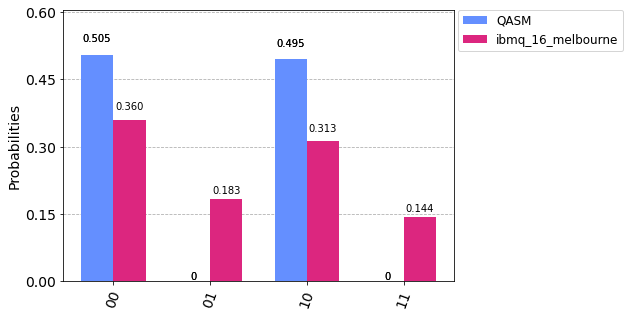

In [18]:
legend = ['QASM','ibmq_16_melbourne']
plot_histogram([ans,ans_quantum], legend=legend)